In [1]:
import numpy as np
import pandas as pd
df_2016= pd.read_csv("../data/raw/survey_2016.csv")

df_2016.columns


Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [67]:

# Dictionary mapping old column names to new column names
column_mapping = {
    'Are you self-employed?': 'self_employed',
    'How many employees does your company or organization have?': 'no_employees',
    'Is your employer primarily a tech company/organization?': 'tech_company',
    'Is your primary role within your company related to tech/IT?': 'tech_role',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'benefits',
    'Do you know the options for mental health care available under your employer-provided coverage?': 'care_options',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'wellness_program',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'seek_help',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'anonymity',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'medical_leave',
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?': 'mental_health_consequence',
    'Do you think that discussing a physical health issue with your employer would have negative consequences?': 'phys_health_consequence',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?': 'coworkers',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': 'supervisor',
    'Do you feel that your employer takes mental health as seriously as physical health?': 'mental_vs_physical',
    'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': 'obs_consequence',
    'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?': 'mental_health_coverage',
    'Do you know local or online resources to seek help for a mental health disorder?': 'local_resources',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'reveal_to_clients',
    'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?': 'client_impact',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'reveal_to_coworkers',
    'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?': 'coworker_impact',
    'Do you believe your productivity is ever affected by a mental health issue?': 'productivity_impact',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'work_time_impact',
    'Do you have previous employers?': 'previous_employers',
    'Have your previous employers provided mental health benefits?': 'previous_benefits',
    'Were you aware of the options for mental health care provided by your previous employers?': 'previous_care_options',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'previous_wellness_program',
    'Did your previous employers provide resources to learn more about mental health issues and how to seek help?': 'previous_seek_help',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'previous_anonymity',
    'Do you think that discussing a mental health disorder with previous employers would have negative consequences?': 'previous_mental_health_consequence',
    'Do you think that discussing a physical health issue with previous employers would have negative consequences?': 'previous_phys_health_consequence',
    'Would you have been willing to discuss a mental health issue with your previous co-workers?': 'previous_coworkers',
    'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?': 'previous_supervisor',
    'Did you feel that your previous employers took mental health as seriously as physical health?': 'previous_mental_vs_physical',
    'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?': 'previous_obs_consequence',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'phys_health_interview',
    'Why or why not?': 'phys_health_interview_reason',
    'Would you bring up a mental health issue with a potential employer in an interview?': 'mental_health_interview',
    'Why or why not?.1': 'mental_health_interview_reason',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'mental_health_career_impact',
    'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': 'coworker_perception',
    'How willing would you be to share with friends and family that you have a mental illness?': 'share_with_family',
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?': 'observed_bad_response',
    'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': 'observed_impact',
    'Do you have a family history of mental illness?': 'family_history',
    'Have you had a mental health disorder in the past?': 'past_mental_health_disorder',
    'Do you currently have a mental health disorder?': 'current_mental_health_disorder',
    'If yes, what condition(s) have you been diagnosed with?': 'current_conditions_diagnosed',
    'If maybe, what condition(s) do you believe you have?': 'suspected_conditions',
    'Have you been diagnosed with a mental health condition by a medical professional?': 'diagnosed_conditions',
    'If so, what condition(s) were you diagnosed with?': 'diagnosed_conditions_detail',
    'Have you ever sought treatment for a mental health issue from a mental health professional?': 'sought_treatment',
    'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?': 'work_interfere_treated',
    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'work_interfere_untreated',
    'What is your age?': 'age',
    'What is your gender?': 'sex',
    'What country do you live in?': 'country',
    'What US state or territory do you live in?': 'state',
    'What country do you work in?': 'work_country',
    'What US state or territory do you work in?': 'work_state',
    'Which of the following best describes your work position?': 'work_position',
    'Do you work remotely?': 'remote_work'
}

# Renaming the columns
df_2016 = df_2016.rename(columns=column_mapping)

# Now you can check the new column names
print(df_2016.columns)


Index(['self_employed', 'no_employees', 'tech_company', 'tech_role',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'medical_leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_vs_physical', 'obs_consequence',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?',
       'local_resources', 'reveal_to_clients', 'client_impact',
       'reveal_to_coworkers', 'coworker_impact', 'productivity_impact',
       'work_time_impact', 'previous_employers', 'previous_benefits',
       'previous_care_options', 'previous_wellness_program',
       'previous_seek_help', 'previous_anonymity',
       'previous_mental_health_consequence',
       'previous_phys_health_consequence', 'previous_coworkers',
       'previous_supervisor', 'previous_mental_vs_physical',
       'previous_obs_consequence', 'phys_health_interview',
       'phy

In [68]:
df_2016

,self_employed,no_employees,tech_company,tech_role,benefits,care_options,wellness_program,seek_help,anonymity,medical_leave,...,work_interfere_treated,work_interfere_untreated,age,sex,country,state,work_country,work_state,work_position,remote_work
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [69]:
df_2016.isna().sum()

self_employed       0
no_employees      287
tech_company      287
tech_role        1170
benefits          287
                 ... 
state             593
work_country        0
work_state        582
work_position       0
remote_work         0
Length: 63, dtype: int64

In [70]:
# work on: Age, Gender, Country, benefits, wellness_program, past_mental_health_disorder', current_mental_health_disorder', 'current_conditions_diagnosed', no_employees
#questions: % of females and males with mh disorder (present + past), most frequent country, what age?
# How it relates to the company size? more cases in bigger companies?
# do company offer treatment and benefits? Less cases?

In [71]:
df_2016["country"].value_counts()

country
United States of America    840
United Kingdom              180
Canada                       78
Germany                      58
Netherlands                  48
Australia                    35
Sweden                       19
France                       16
Ireland                      15
Switzerland                  10
Brazil                       10
Russia                        9
India                         9
New Zealand                   9
Bulgaria                      7
Finland                       7
Denmark                       7
Belgium                       5
Italy                         5
Poland                        4
Spain                         4
Austria                       4
South Africa                  4
Romania                       4
Chile                         3
Czech Republic                3
Pakistan                      3
Norway                        3
Lithuania                     2
Japan                         2
Mexico                        2


In [72]:
df_2016.country.isna().sum()

#Columns is clean from Nan and can be used for analysis

np.int64(0)

In [73]:
import pycountry
print(pycountry.countries)

In [74]:
import pycountry

# List of European countries
european_countries = [
    country.name for country in pycountry.countries
    if country.alpha_2 in {
        'AL', 'AD', 'AM', 'AT', 'AZ', 'BY', 'BE', 'BA', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR', 'GE', 'DE', 
        'GR', 'HU', 'IS', 'IE', 'IT', 'KZ', 'XK', 'LV', 'LI', 'LT', 'LU', 'MT', 'MD', 'MC', 'ME', 'NL', 'MK', 'NO', 
        'PL', 'PT', 'RO', 'RU', 'SM', 'RS', 'SK', 'SI', 'ES', 'SE', 'CH', 'UA', 'GB', 'VA'
    }
]

print(european_countries)

def grouped_countries(country):
    if country in european_countries:
        return "Europe"
    else:
        return country

df_2016["country"] = df_2016["country"].apply(grouped_countries)

df_2016["country"].value_counts()

#European countries grouped into Europe
#Now I want to filter and keep only the 4 most frequent values

['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belgium', 'Bulgaria', 'Bosnia and Herzegovina', 'Belarus', 'Switzerland', 'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom', 'Georgia', 'Greece', 'Croatia', 'Hungary', 'Ireland', 'Iceland', 'Italy', 'Kazakhstan', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Latvia', 'Monaco', 'Moldova, Republic of', 'North Macedonia', 'Malta', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Sweden', 'Ukraine', 'Holy See (Vatican City State)']


country
United States of America    840
Europe                      406
Canada                       78
Australia                    35
Brazil                       10
Russia                        9
India                         9
New Zealand                   9
South Africa                  4
Czech Republic                3
Chile                         3
Pakistan                      3
Colombia                      2
Mexico                        2
Other                         2
Israel                        2
Japan                         2
Afghanistan                   2
Vietnam                       1
Costa Rica                    1
Argentina                     1
Venezuela                     1
Brunei                        1
Algeria                       1
Bangladesh                    1
Iran                          1
Ecuador                       1
China                         1
Guatemala                     1
Taiwan                        1
Name: count, dtype: int64

In [75]:
#top_4_countries = df_2016["country"].value_counts().head(4).index

# Filter the DataFrame to keep only these 4 values
#df_2016 = df_2016[df_2016["country"].isin(top_4_countries)]

#df_2016.country.value_counts()

In [76]:
df_2016.sex.isna().sum()
# columns has 3 Nan: drop them

np.int64(3)

In [77]:
df_2016.sex.value_counts()

sex
Male                                       610
male                                       249
Female                                     153
female                                      95
M                                           86
                                          ... 
female-bodied; no feelings about gender      1
cis man                                      1
AFAB                                         1
Transgender woman                            1
MALE                                         1
Name: count, Length: 70, dtype: int64

In [78]:
df_2016.dropna(subset = ["sex"], inplace = True)
df_2016.sex.isna().sum()

#Nan removed from sex

np.int64(0)

In [79]:
df_2016["sex"].unique()

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'Woman', 'man', 'fm', 'f',
       'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', 'Male (cis)', 'Other', 'nb masculine',
       'Cisgender Female', 'Man', 'Sex is male', 'none of your business',
       'genderqueer', 'cis male', 'Human', 'Genderfluid', 'Enby', 'Malr',
       'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'male ',
       'human', 'Female (props for making this a freefor

In [80]:
#Assigning F or M values to sex column:

stand_gender = {"MALE":"M", "Male":"M", "M|":"M", "Dude":"M", "m":"M", "male ":"M", "M":"M", "male":"M", "Make":"M", "cisdude":"M", "maile": "M", "Mal":"M", "Malr":"M", "Male.":"M", "Mail":"M", "cis man":"M", "cis male":"M", "Cis Man":"M", "msale":"M", "Androgyne":"M", "Male-ish":"M", "Man":"M", "Male (CIS)":"M", "Cis Male":"M", "Sex is male":"M",
                "F":"F", "female":"F", "Female":"F", "f":"F", "female/woman":"F", "fem":"F", "Femal":"F", "femail":"F", "I identify as female":"F", "Woman":"F", "Cisgender Female":"F","cis-female/femme":"F","Femake":"F", "woman":"F", "Cis-woman":"F", "Cis Female":"F", "Female assigned at birth": "F", "fm":"F", "fem":"F", "Female (props for making this a freeform field, though)":"F"}

df_2016["sex"] = df_2016["sex"].map(stand_gender).str.strip().str.upper()

df_2016["sex"].unique()
df_2016.sex.isna().sum()

#This generated 70 Nan: will drop them

np.int64(70)

In [81]:
df_2016.dropna(subset = ["sex"], inplace = True)
df_2016.sex.isna().sum()
#NAN removed

np.int64(0)

In [82]:
df_2016["sex"].value_counts()

sex
M    1038
F     322
Name: count, dtype: int64

In [83]:
df_2016.age.isna().sum()
#No NaN here

np.int64(0)

In [84]:
df_2016.age.unique()
#some values make no sense: 323, 3, 15: will drop them

array([ 39,  29,  43,  42,  30,  37,  44,  28,  34,  35,  52,  31,  26,
        25,  33,  38,  27,  36,  40,  41,  32,  45,  46,  19,  21,  24,
        17,  23,  22,  51,  48,  55,  50,  49,  20,  54,  47,  56,  57,
        63,  61, 323,  62,  53,  58,   3,  66,  59,  15,  65,  70])

In [85]:
df_2016 = df_2016[(df_2016['age'] >= 17) & (df_2016['age'] <= 70)]
df_2016.age.unique()

#Column is clean but age should be grouped

array([39, 29, 43, 42, 30, 37, 44, 28, 34, 35, 52, 31, 26, 25, 33, 38, 27,
       36, 40, 41, 32, 45, 46, 19, 21, 24, 17, 23, 22, 51, 48, 55, 50, 49,
       20, 54, 47, 56, 57, 63, 61, 62, 53, 58, 66, 59, 65, 70])

In [86]:
#Defining a function to group age

def create_age_group(age):
    if 17 <=  age <= 25:
        return "17-25"
    elif 26 <=  age <= 35:
        return "26-35"
    elif 36 <=  age <= 45:
        return "36-45"
    elif 46 <=  age <= 55:
        return "46-55"
    else:
        return "56-70"   

df_2016['age'] = df_2016['age'].apply(create_age_group)
df_2016.age.unique()

/var/folders/s7/4sn2754148dcqgykzktgd2q40000gp/T/ipykernel_32896/2540175696.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['age'] = df_2016['age'].apply(create_age_group)


array(['36-45', '26-35', '46-55', '17-25', '56-70'], dtype=object)

In [87]:
df_2016.age.value_counts()

age
26-35    700
36-45    385
17-25    149
46-55    101
56-70     22
Name: count, dtype: int64

In [88]:
df_2016["no_employees"].unique()

array(['26-100', '6-25', nan, 'More than 1000', '100-500', '500-1000',
       '1-5'], dtype=object)

In [89]:
df_2016['no_employees'].value_counts()

no_employees
26-100            279
More than 1000    243
100-500           235
6-25              199
500-1000           76
1-5                57
Name: count, dtype: int64

In [90]:
df_2016["no_employees"].isna().sum()

np.int64(268)

In [91]:
# Distribute the Nan into the different categories without affecting their proportions:

categories = df_2016['no_employees'].dropna().value_counts(normalize=True)

num_missing = df_2016['no_employees'].isna().sum()

# Generate missing values based on the proportions
missing_values = np.random.choice(
    categories.index,
    size=num_missing,
    p=categories.values
)

# Replace NaN values directly in the DataFrame
df_2016.loc[df_2016['no_employees'].isna(), 'no_employees'] = missing_values

# Check if there are any NaNs left
print(df_2016['no_employees'].unique())  # Should show no NaNs
print(df_2016['no_employees'].isna().sum())  # Should be 0


['26-100' '6-25' '100-500' 'More than 1000' '500-1000' '1-5']
0


In [92]:
#Creating a function to group company size

def create_size_group(no_employees):
    # Handle cases where employee range is given
    if '-' in no_employees:
        lower_bound, upper_bound = no_employees.split('-')
        lower_bound = int(lower_bound)
        upper_bound = int(upper_bound)
    elif 'More than' in no_employees:
        lower_bound = int(no_employees.split()[-1])
        upper_bound = np.inf  # Infinite upper bound for "More than" cases
    else:
        lower_bound = int(no_employees)
        upper_bound = lower_bound  # Single number case

    # Define the categories
    if upper_bound <= 10:
        return "Micro"
    elif upper_bound <= 50:
        return "Small"
    elif upper_bound <= 250:
        return "Medium-sized"
    else:
        return "Large"

# Apply the function to the 'no_employees' column
df_2016['no_employees'] = df_2016['no_employees'].apply(create_size_group)

# Check the unique values
print(df_2016['no_employees'].unique())
print(df_2016['no_employees'].value_counts())

['Medium-sized' 'Small' 'Large' 'Micro']
no_employees
Large           691
Medium-sized    360
Small           234
Micro            72
Name: count, dtype: int64


/var/folders/s7/4sn2754148dcqgykzktgd2q40000gp/T/ipykernel_32896/2653297201.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['no_employees'] = df_2016['no_employees'].apply(create_size_group)


In [93]:
display(df_2016["diagnosed_conditions"].isna().sum())
display(df_2016["diagnosed_conditions"].value_counts())
display(df_2016["sex"].value_counts())

np.int64(0)

diagnosed_conditions
No     693
Yes    664
Name: count, dtype: int64

sex
M    1035
F     322
Name: count, dtype: int64

In [94]:
df_2016.groupby(['sex','diagnosed_conditions'])['diagnosed_conditions'].count() #how many F and M have been diagnosed, #Question: What is the prevalence of diagnosed cases in the workplace by sex?


sex  diagnosed_conditions
F    No                      115
     Yes                     207
M    No                      578
     Yes                     457
Name: diagnosed_conditions, dtype: int64

In [95]:
#Question: What is the prevalence of diagnosed cases in the workplace by sex?

#Calculating the % of M and F normalized to the total of women and men and in the df:
# Step 1: Group by 'sex' and 'diagnosed_conditions' and get the count
grouped = df_2016.groupby(['sex', 'diagnosed_conditions'])['diagnosed_conditions'].count()

# Step 2: Calculate the total count per sex
total_per_sex = df_2016.groupby('sex')['diagnosed_conditions'].count()

# Step 3: Calculate the percentage
percentage_diagnosed = (grouped / total_per_sex * 100).round(0).astype(int)

# Display the result
print(percentage_diagnosed)

sex  diagnosed_conditions
F    No                      36
     Yes                     64
M    No                      56
     Yes                     44
Name: diagnosed_conditions, dtype: int64


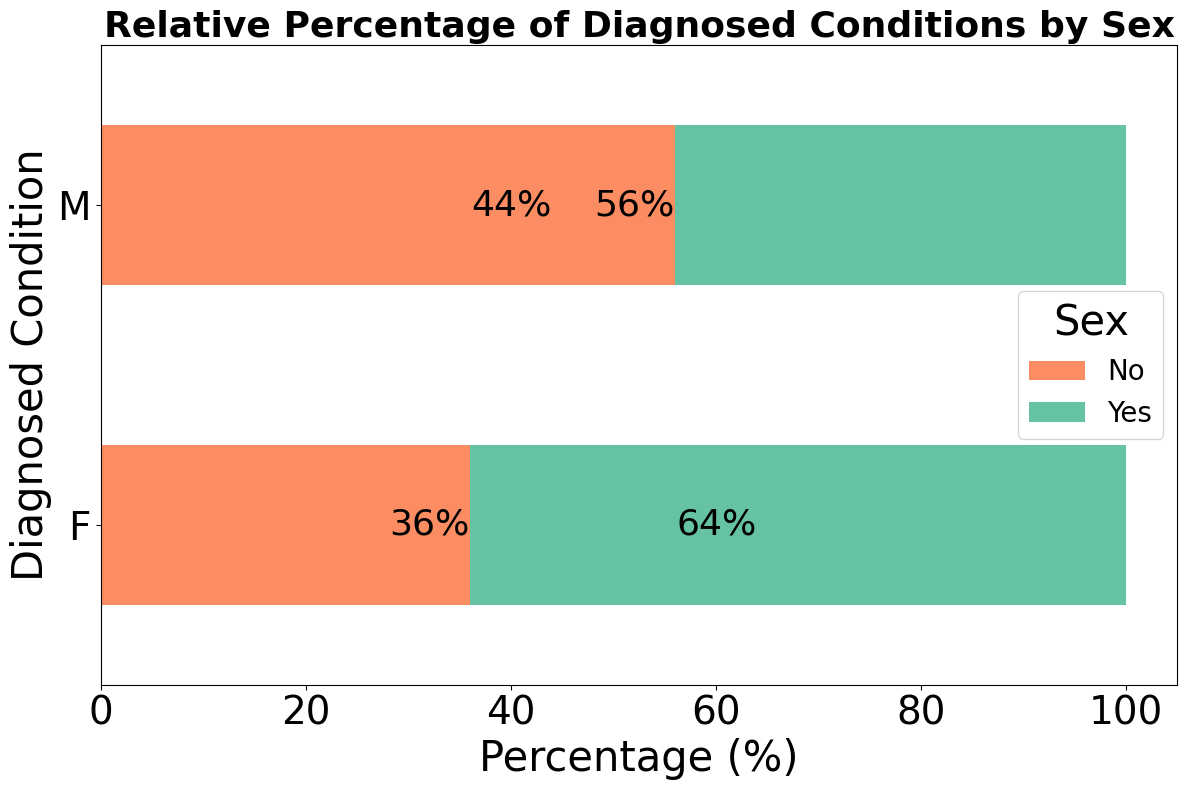

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the Series `percentage_diagnosed`
# Convert the Series to DataFrame
percentage_diagnosed = percentage_diagnosed.unstack()  # This reshapes the Series into a DataFrame

# Get colors from Seaborn's Set2 palette
palette = sns.color_palette('Set2', n_colors=percentage_diagnosed.shape[1])
colors = palette.as_hex()  # Convert to hex format

# Reverse the color list
colors = colors[::-1]

# Create a stacked horizontal bar chart
ax = percentage_diagnosed.plot(kind='barh', stacked=True, figsize=(12, 8), color=colors)

# Set the title and labels with larger font sizes
ax.set_title('Relative Percentage of Diagnosed Conditions by Sex', fontsize=26, weight='bold')
ax.set_xlabel('Percentage (%)', fontsize=30)
ax.set_ylabel('Diagnosed Condition', fontsize=30)

# Customize the legend
# Invert the order of the legend manually
handles, labels = ax.get_legend_handles_labels()
# Map labels to the reversed legend order
label_order = {label: handle for label, handle in zip(labels, handles)}
# Define the order of the legend based on the sex categories
legend_labels = sorted(label_order.keys())  # Assuming you want to sort the legend labels alphabetically
ax.legend([label_order[label] for label in legend_labels], legend_labels, title='Sex', title_fontsize='30', fontsize='20')

# Remove grid lines
ax.grid(False)

# Add labels to the bars with a larger font size
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        label = f'{width:.0f}%'
        ax.text(width, bar.get_y() + bar.get_height() / 2, label, va='center', ha='right', fontsize=26, color='black')

# Increase the size of the numbers on x and y axes
ax.tick_params(axis='x', labelsize=28)
ax.tick_params(axis='y', labelsize=28)

# Adjust the spacing between bars (age groups) by reducing the layout padding
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)  # Adjust these parameters to control spacing

# Adjust layout for better display
plt.tight_layout()
plt.savefig('Prevalence of Diagnosed Conditions by Sex.jpeg', format='jpeg', dpi=300)

# Show the plot
plt.show()


In [97]:
#Question: What is the prevalence of diagnosed cases in the workplace by age and sex?

pivot_table = df_2016[df_2016['diagnosed_conditions'] == 'Yes'].pivot_table(
    index='age',  
    columns='sex',  
    values='diagnosed_conditions',  
    aggfunc='count'  
)

pivot_table


sex,F,M
age,,
17-25,25,39
26-35,94,237
36-45,55,136
46-55,26,37
56-70,7,8


In [98]:
#Question: What is the prevalence of diagnosed cases in the workplace by age and sex?

# Normalize to total of F and M  int the dataframe:

pivot_table_percentage_age_sex = df_2016[df_2016['diagnosed_conditions'] == 'Yes'].pivot_table(
    index='age',  #
    columns='sex',  
    values='diagnosed_conditions',  
    aggfunc='count'  
)

total_female = 322
total_male = 1038


pivot_table_percentage_age_sex ['F'] = ((pivot_table_percentage_age_sex ['F'] / total_female) * 100).round(0).astype(int)
pivot_table_percentage_age_sex ['M'] = ((pivot_table_percentage_age_sex ['M'] / total_male) * 100).round(0).astype(int)


print(pivot_table_percentage_age_sex)


sex     F   M
age          
17-25   8   4
26-35  29  23
36-45  17  13
46-55   8   4
56-70   2   1


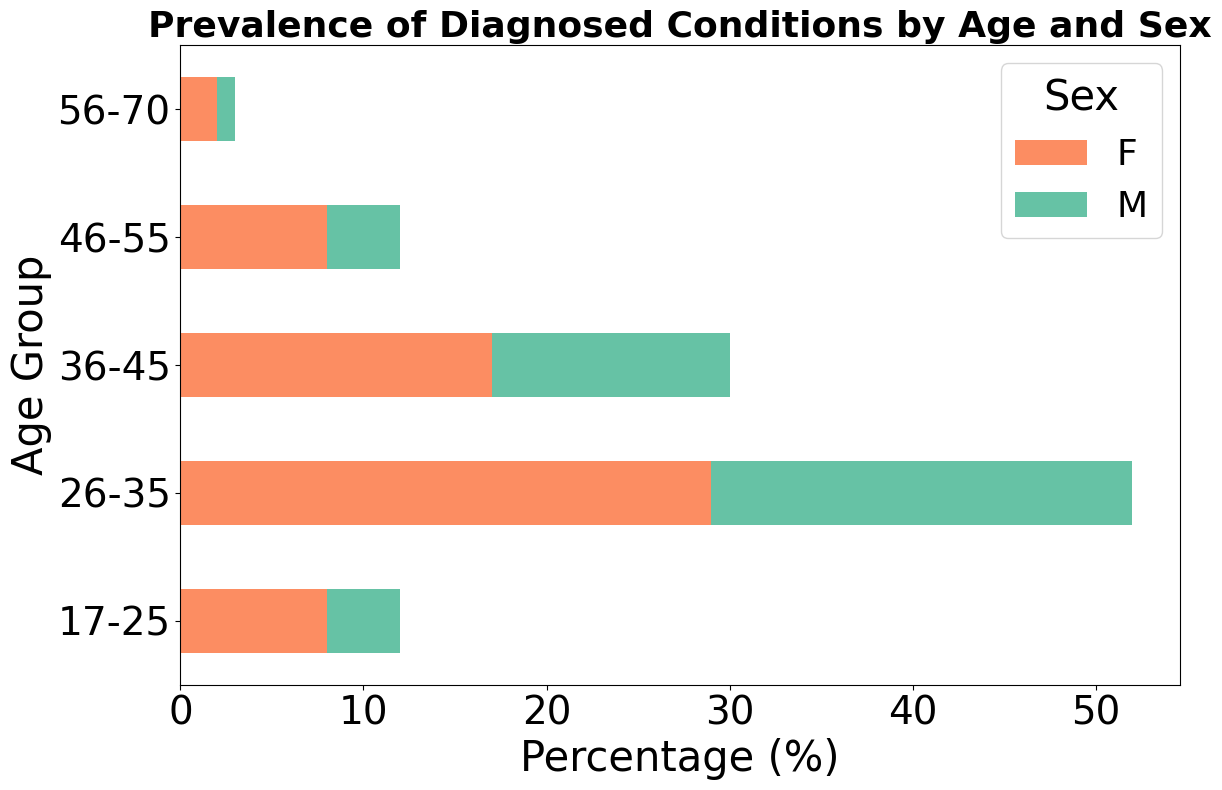

In [99]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

sns.set_palette("Set2")

ax = pivot_table_percentage_age_sex.plot(kind='barh', stacked=True, figsize=(12, 8), color=colors)

# Set the title and labels with larger font sizes
ax.set_title('Prevalence of Diagnosed Conditions by Age and Sex', fontsize=26, weight='bold')
ax.set_xlabel('Percentage (%)', fontsize=30)
ax.set_ylabel('Age Group', fontsize=30)

# Customize the legend
ax.legend(title='Sex', title_fontsize='30', fontsize='26')

# Remove grid lines
ax.grid(False)

# Function to determine the best text color based on background brightness
def get_text_color(background_color):
    r, g, b, _ = background_color  # RGBA values
    brightness = np.sqrt(0.299 * r ** 2 + 0.587 * g ** 2 + 0.114 * b ** 2)
    return 'black' if brightness > 0.5 else 'white'

# Add labels to the bars ensuring readability
for i, container in enumerate(ax.containers):
    for j, rect in enumerate(container):
        width = rect.get_width()
        label = f'{width:.0f}%'
        height = rect.get_height()
        y = rect.get_y() + height / 2  # Center the text vertically

        text_color = get_text_color(rect.get_facecolor())

       
# Increase the size of the numbers on x and y axes
ax.tick_params(axis='x', labelsize=28)
ax.tick_params(axis='y', labelsize=28)

# Adjust the spacing between bars (age groups) by reducing the layout padding
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)  # Adjust these parameters to control spacing

# Adjust layout for better display
plt.tight_layout()

plt.savefig('Prevalence of Diagnosed Conditions by Age and Sex.jpeg', format='jpeg', dpi=300)

# Show the plot
plt.show()

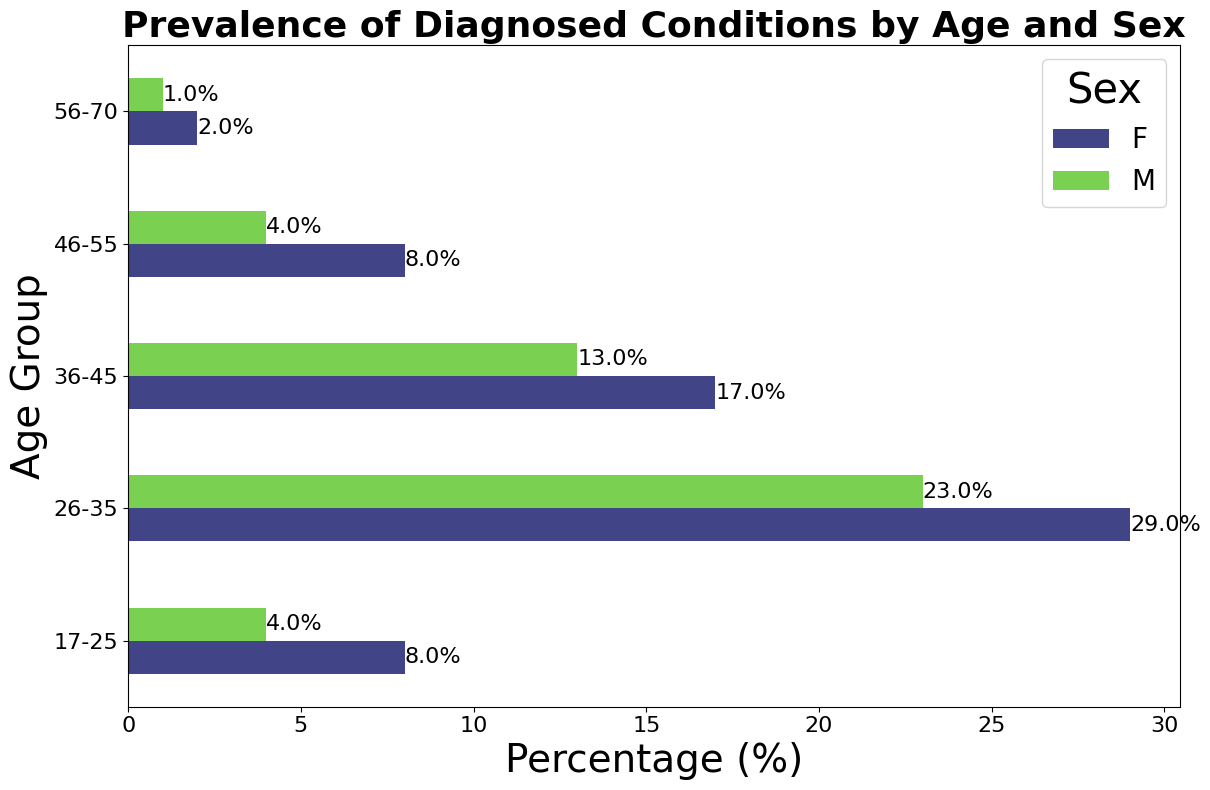

In [100]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


colors = cm.viridis([0.2, 0.8])  

ax = pivot_table_percentage_age_sex.plot(kind='barh', figsize=(12, 8), color=colors)

# Set the title and labels with larger font sizes
ax.set_title('Prevalence of Diagnosed Conditions by Age and Sex', fontsize=26, weight='bold')
ax.set_xlabel('Percentage (%)', fontsize=28)
ax.set_ylabel('Age Group', fontsize=28)

# Customize the legend
ax.legend(title='Sex', title_fontsize='30', fontsize='20')

# Remove grid lines
ax.grid(False)

# Add labels to the bars with a larger font size
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=16, color='black')

# Increase the size of the numbers on x and y axes
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Adjust the spacing between bars (age groups) by reducing the layout padding
plt.subplots_adjust(left=0.2, right=2, top=0.9, bottom=0.1)  # Adjust these parameters to control spacing

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()


In [101]:
#Question: is the prevalence of diagnosed mental health cases in the workplace higher in the US or Europe?

# Filter the DataFrame to include only "Europe" and "United States of America"
filtered_df = df_2016[df_2016['country'].isin(['Europe', 'United States of America'])]

# Create the pivot table from the filtered DataFrame
pivot_table_country = filtered_df[filtered_df['diagnosed_conditions'] == 'Yes'].pivot_table(
    index='diagnosed_conditions',  
    columns='country',  
    values='age',  
    aggfunc='count'
)

total_counts_Europe = 406
total_counts_US = 840


pivot_table_country['Europe'] = ((pivot_table_country['Europe'] / total_counts_Europe) * 100).round(0).astype(int)
pivot_table_country['United States of America'] = ((pivot_table_country['United States of America'] / total_counts_US) * 100).round(0).astype(int)


pivot_table_country


country,Europe,United States of America
diagnosed_conditions,,
Yes,36,53


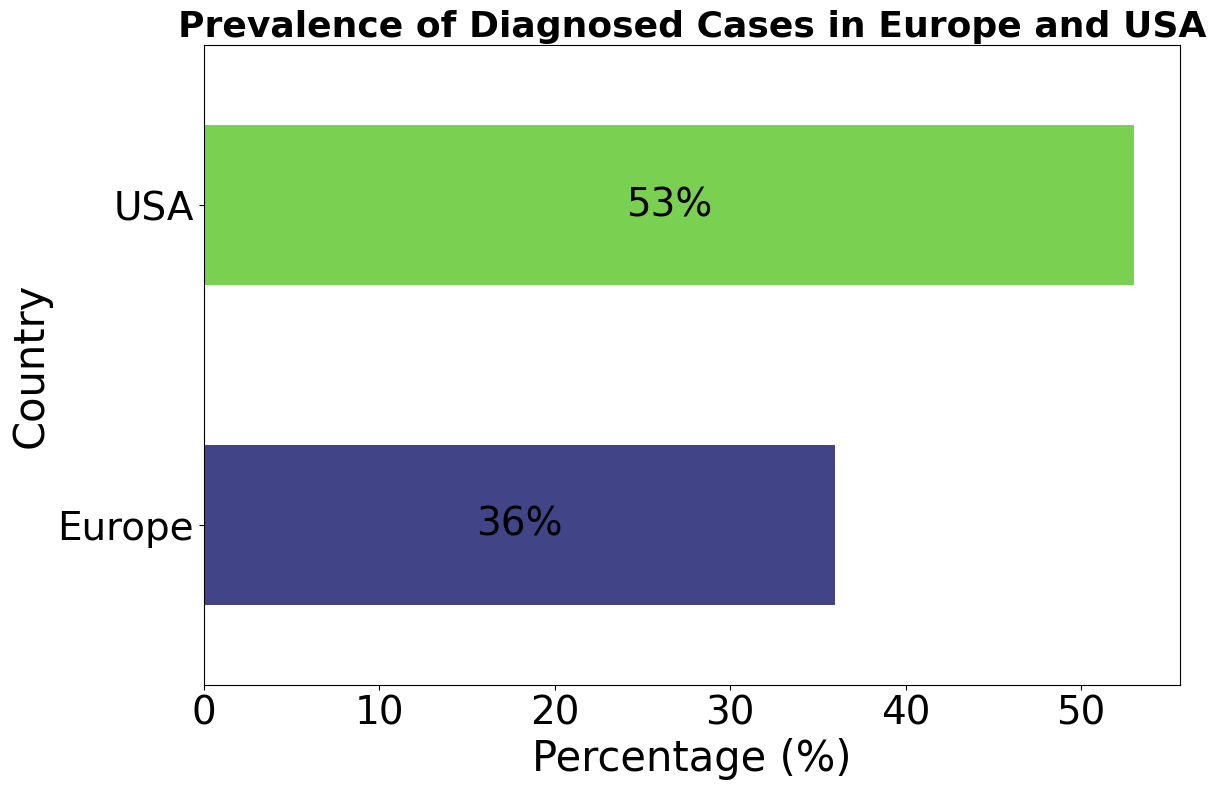

In [102]:
sns.set_palette("Set2")  

ax = pivot_table_country.loc['Yes'].plot(kind='barh', figsize=(12, 8), color=colors)

# Set the title and labels with larger font sizes
ax.set_title('Prevalence of Diagnosed Cases in Europe and USA', fontsize=26, weight='bold')
ax.set_xlabel('Percentage (%)', fontsize=30)
ax.set_ylabel('Country', fontsize=30)

# Remove grid lines
ax.grid(False)

# Add labels to the bars with a larger font size
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', fontsize=28, label_type='center')

# Increase the size of the numbers on x and y axes
ax.tick_params(axis='x', labelsize=28)
ax.tick_params(axis='y', labelsize=28)

# Remove the legend
if ax.get_legend() is not None:
    ax.get_legend().remove()

# Set y-axis labels manually
ax.set_yticklabels(['Europe', 'USA'])

# Adjust the spacing between bars (age groups) by reducing the layout padding
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)  # Adjust these parameters to control spacing

# Adjust layout for better display
plt.tight_layout()

# Save the plot as a JPEG file
plt.savefig('Prevalence of Diagnosed Cases in Europe and USA.jpeg', format='jpeg', dpi=300)


# Show the plot
plt.show()

In [103]:
df_2016.groupby(["no_employees",'diagnosed_conditions'])['diagnosed_conditions'].count()

no_employees  diagnosed_conditions
Large         No                      335
              Yes                     356
Medium-sized  No                      187
              Yes                     173
Micro         No                       39
              Yes                      33
Small         No                      132
              Yes                     102
Name: diagnosed_conditions, dtype: int64

In [104]:
df_2016.columns

Index(['self_employed', 'no_employees', 'tech_company', 'tech_role',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'medical_leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_vs_physical', 'obs_consequence',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?',
       'local_resources', 'reveal_to_clients', 'client_impact',
       'reveal_to_coworkers', 'coworker_impact', 'productivity_impact',
       'work_time_impact', 'previous_employers', 'previous_benefits',
       'previous_care_options', 'previous_wellness_program',
       'previous_seek_help', 'previous_anonymity',
       'previous_mental_health_consequence',
       'previous_phys_health_consequence', 'previous_coworkers',
       'previous_supervisor', 'previous_mental_vs_physical',
       'previous_obs_consequence', 'phys_health_interview',
       'phy

In [105]:
df_2016.benefits.isna().sum()

np.int64(268)

In [106]:
df_2016.benefits.value_counts()

benefits
Yes                                504
I don't know                       307
No                                 206
Not eligible for coverage / N/A     72
Name: count, dtype: int64

In [107]:
df_2016.benefits = df_2016.benefits.fillna("I don't know")
df_2016.benefits.value_counts()

/var/folders/s7/4sn2754148dcqgykzktgd2q40000gp/T/ipykernel_32896/1121132095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016.benefits = df_2016.benefits.fillna("I don't know")


benefits
I don't know                       575
Yes                                504
No                                 206
Not eligible for coverage / N/A     72
Name: count, dtype: int64

In [108]:
df_2016.no_employees.value_counts()

no_employees
Large           691
Medium-sized    360
Small           234
Micro            72
Name: count, dtype: int64

In [109]:
# Filter the DataFrame to include only "Europe" and "United States of America"
filtered_df_ben = df_2016[df_2016['benefits'].isin(['Yes', 'No', "I don't know"])]


pivot_table_ben = pd.pivot_table(filtered_df_ben, 
                                 index='no_employees',  
                                 columns='benefits',    
                                 values='age',  
                                 aggfunc='count')

total_counts = {
    'Large': 678,
    'Medium-sized': 348,
    'Small': 255,
    'Micro': 76
}

# Normalize the data based on the total counts per employee size
for idx in pivot_table_ben.index:
    if idx in total_counts:
        pivot_table_ben.loc[idx] = ((pivot_table_ben.loc[idx] / total_counts[idx]) * 100).round(0).astype(int)

# Display the pivot table
pivot_table_ben


benefits,I don't know,No,Yes
no_employees,,,
Large,42,9,46
Medium-sized,48,15,37
Micro,34,34,12
Small,36,25,22


<Figure size 1800x1000 with 0 Axes>

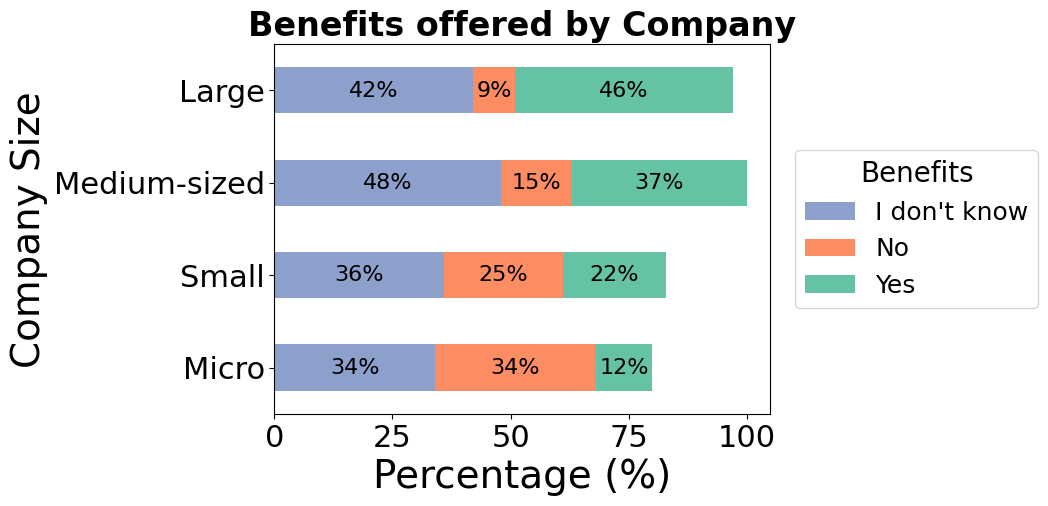

In [110]:
# Reorder the rows to have "Large enterprise" first and "Micro enterprise" last
ordered_index = ['Micro', 'Small', 'Medium-sized', 'Large']
pivot_table_ben = pivot_table_ben.reindex(ordered_index)

# Get colors from Seaborn's Set2 palette
palette = sns.color_palette('Set2', n_colors=pivot_table_ben.shape[1])
colors = palette.as_hex()  # Convert to hex format

# Reverse the color list
colors = colors[::-1]

# Create a horizontal bar chart with stacked bars
plt.figure(figsize=(18, 10))  # Increased width for more room
ax = pivot_table_ben.plot(kind='barh', stacked=True, color=colors, edgecolor='none')

# Set the title and labels with larger font sizes
ax.set_title('Benefits offered by Company', fontsize=24, weight='bold')
ax.set_xlabel('Percentage (%)', fontsize=28)
ax.set_ylabel('Company Size', fontsize=28)

# Customize the legend
legend_labels = pivot_table_ben.columns.tolist()  # Use the actual column names for legend
handles, labels = ax.get_legend_handles_labels()

# Position the legend to the right of the plot, outside the plotting area
ax.legend(handles, legend_labels,
          title='Benefits',
          title_fontsize='20',
          fontsize='18',
          bbox_to_anchor=(1.05, 0.5),  # Move the legend completely outside the plot area
          loc='center left',
          borderaxespad=0.0)  # Minimal padding between the plot and legend

# Remove grid lines
ax.grid(False)

# Add labels to the bars with a larger font size
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', fontsize=16, label_type='center')

# Increase the size of the numbers on x and y axes
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)

# Directly set bounding box for the entire figure to avoid unnecessary shrinking
plt.savefig('Benefits_offered_by_Company_fixed.jpeg', format='jpeg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [111]:
# Filter the DataFrame to include only "Europe" and "United States of America"
filtered_df = df_2016[
    (df_2016['country'].isin(['Europe', 'United States of America'])) & 
    (df_2016['benefits'].isin(['Yes', 'No', "I don't know"]))
]

# Create the pivot table using the filtered DataFrame
pivot_table_country_ben = pd.pivot_table(
    filtered_df, 
    index='country',  
    columns='benefits',    
    values='age',  
    aggfunc='count'
)

# Total counts for normalization
total_counts = {
    "Europe": 406,
    "United States of America": 840
}

# Normalize the data based on the total counts per country
for idx in pivot_table_country_ben.index:
    if idx in total_counts:
        pivot_table_country_ben.loc[idx] = ((pivot_table_country_ben.loc[idx] / total_counts[idx]) * 100).round(0).astype(int)

# Display the pivot table
pivot_table_country_ben


benefits,I don't know,No,Yes
country,,,
Europe,48,23,14
United States of America,37,8,49


<Figure size 1800x1000 with 0 Axes>

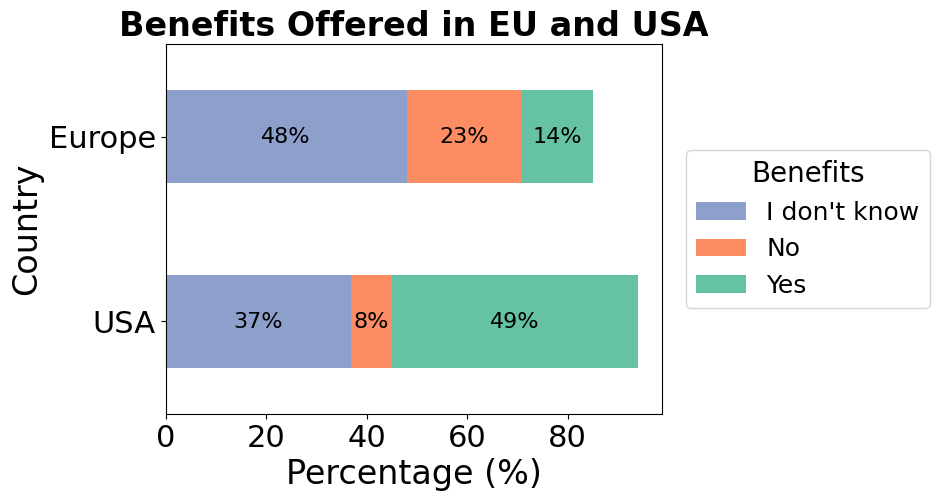

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reorder the rows to have "United States of America" first and "Europe" last (if needed)
ordered_index = ['United States of America', 'Europe']
pivot_table_country_ben = pivot_table_country_ben.reindex(ordered_index)

# Get colors from Seaborn's Set2 palette
palette = sns.color_palette('Set2', n_colors=pivot_table_country_ben.shape[1])
colors = palette.as_hex()  # Convert to hex format

# Reverse the color list (if you want to reverse the color order)
colors = colors[::-1]

# Create a horizontal bar chart with stacked bars
plt.figure(figsize=(18, 10))  # Increased width for more room
ax = pivot_table_country_ben.plot(kind='barh', stacked=True, color=colors, edgecolor='none')

# Set the title and labels with larger font sizes
ax.set_title('Benefits Offered in EU and USA', fontsize=24, weight='bold')
ax.set_xlabel('Percentage (%)', fontsize=24)
ax.set_ylabel('Country', fontsize=24)

# Customize the legend
legend_labels = pivot_table_country_ben.columns.tolist()  # Use the actual column names for legend
handles, labels = ax.get_legend_handles_labels()

# Set y-axis labels manually
ax.set_yticklabels(['USA', 'Europe'])

# Position the legend to the right of the plot, outside the plotting area
ax.legend(handles, legend_labels,
          title='Benefits',
          title_fontsize='20',
          fontsize='18',
          bbox_to_anchor=(1.05, 0.5),  # Move the legend completely outside the plot area
          loc='center left',
          borderaxespad=0.0)  # Minimal padding between the plot and legend

# Remove grid lines
ax.grid(False)

# Add labels to the bars with a larger font size
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', fontsize=16, label_type='center')

# Increase the size of the numbers on x and y axes
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)

# Directly set bounding box for the entire figure to avoid unnecessary shrinking
plt.savefig('Benefits_offered_by_Region_fixed.jpeg', format='jpeg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [113]:
import pandas as pd

# Filter the DataFrame to include only "Europe" and "United States of America"
filtered_df_comp = df_2016[df_2016['diagnosed_conditions'].isin(['Yes'])]

# Ensure df_2016 is a DataFrame and contains required columns
pivot_table_company = pd.pivot_table(filtered_df_comp, 
                                 index='no_employees', 
                                 columns='diagnosed_conditions',    
                                 values='age',  
                                 aggfunc='count')

# You don't need to reset the index since 'no_employees' should stay as the index
# Normalize the data if necessary using the appropriate totals per employee size
total_counts = {
    'Large': 678,
    'Medium-sized': 348,
    'Small': 255,
    'Micro': 76
}

# Make sure columns exist before performing operations
for idx in pivot_table_company.index:
    if idx in total_counts:
        pivot_table_company.loc[idx] = ((pivot_table_company.loc[idx] / total_counts[idx]) * 100).round(0).astype(int)

# Display the pivot table
pivot_table_company


diagnosed_conditions,Yes
no_employees,
Large,53
Medium-sized,50
Micro,43
Small,40


/var/folders/s7/4sn2754148dcqgykzktgd2q40000gp/T/ipykernel_32896/3997504087.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)


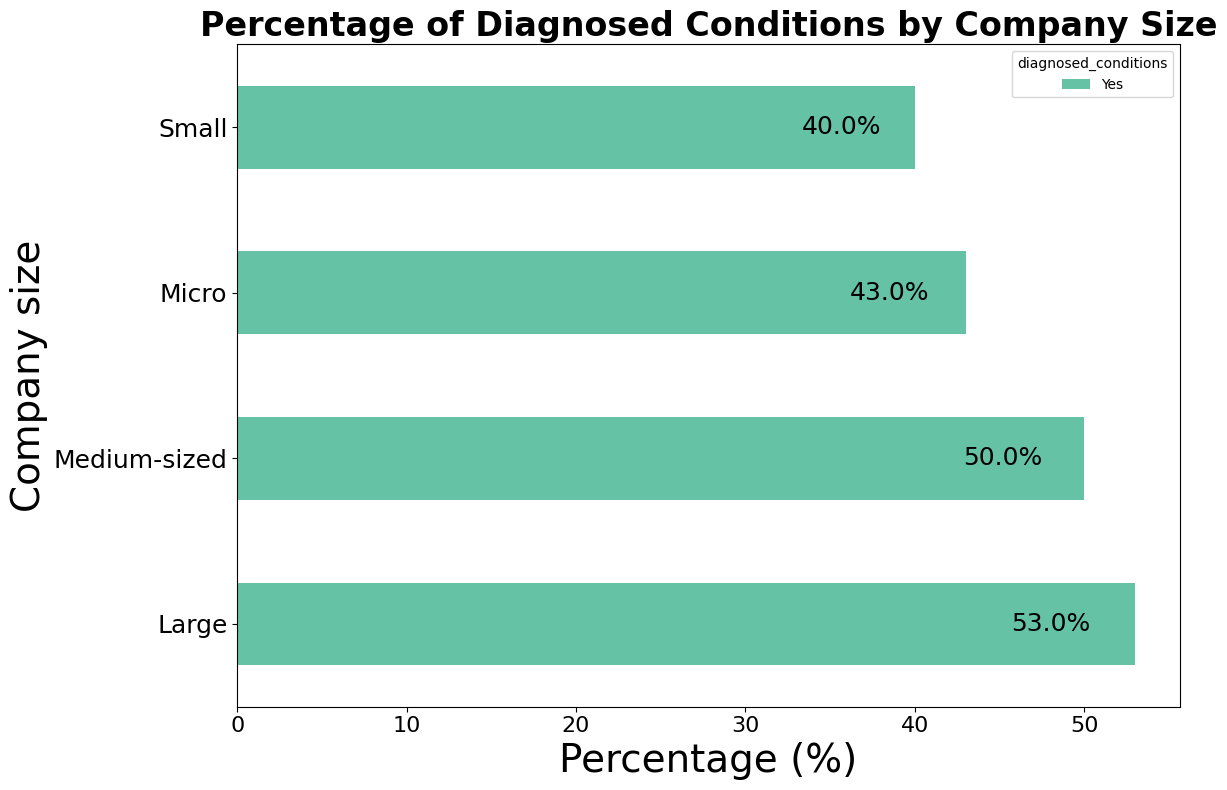

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming pivot_table_company is your DataFrame and is properly prepared

# Set the Seaborn color palette
sns.set_palette("Set2")

# Plotting
ax = pivot_table_company.plot(kind='barh', stacked=True, figsize=(12, 8))

# Add percentage labels inside each bar with increased font size and adjusted position
for patch in ax.patches:
    width = patch.get_width()
    label = f'{width:.1f}%'
    ax.text(width - (width * 0.05), patch.get_y() + patch.get_height() / 2,
            label, ha='right', va='center', fontsize=18, color='black')

# Adding labels and title with increased font sizes
ax.set_xlabel('Percentage (%)', fontsize=28)
ax.set_ylabel('Company size', fontsize=28)
ax.set_title('Percentage of Diagnosed Conditions by Company Size', fontsize=24, weight='bold')

ax.tick_params(axis='x', labelsize=26)
ax.tick_params(axis='y', labelsize=18)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)

plt.tight_layout()

# Save the plot as a JPEG file
plt.savefig('percentage_diagnosed_conditions_by_company_size.jpeg', format='jpeg', dpi=300)

# Adjust layout
plt.tight_layout()
plt.show()


In [115]:
df_2016.wellness_program.isna().sum()

np.int64(268)

In [116]:
df_2016.wellness_program.unique()

array(['No', 'Yes', nan, "I don't know"], dtype=object)

In [117]:
df_2016.wellness_program = df_2016.wellness_program.fillna("I don't know")
df_2016.wellness_program.isna().sum()

/var/folders/s7/4sn2754148dcqgykzktgd2q40000gp/T/ipykernel_32896/768580041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016.wellness_program = df_2016.wellness_program.fillna("I don't know")


np.int64(0)

In [118]:
df_2016.wellness_program.value_counts()

wellness_program
No              775
I don't know    368
Yes             214
Name: count, dtype: int64

In [119]:
# Filter the DataFrame to include only "Europe" and "United States of America"
filtered_df_prog = df_2016[(df_2016['country'].isin(['Europe', 'United States of America']))]
    


# Create the pivot table using the filtered DataFrame
pivot_table_prog = pd.pivot_table(
    filtered_df_prog, 
    index='country',  
    columns='wellness_program',    
    values='age',  
    aggfunc='count'
)

# Total counts for normalization
total_counts = {
    "Europe": 406,
    "United States of America": 840
}

# Normalize the data based on the total counts per country
for idx in pivot_table_prog.index:
    if idx in total_counts:
        pivot_table_prog.loc[idx] = ((pivot_table_prog.loc[idx] / total_counts[idx]) * 100).round(0).astype(int)

# Display the pivot table
pivot_table_prog



wellness_program,I don't know,No,Yes
country,,,
Europe,31,47,15
United States of America,23,57,15
